<a href="https://www.kaggle.com/code/kovanh/gravitational-wave-detection?scriptVersionId=186152691" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Gravitational Wave Detection Competition
---

# Table of Contents
1. [Introduction](#Introduction)
2. [Data Loading and Exploration](#Data-Loading-and-Exploration)
    1. [Loading Data](#Loading-Data)
    2. [Data Overview](#Data-Overview)
    3. [Initial Visualizations](#Initial-Visualizations)
3. [Data Preprocessing](#Data-Preprocessing)
    1. [Handling Missing Values](#Handling-Missing-Values)
    2. [Feature Engineering](#Feature-Engineering)
4. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis)
5. [Signal Processing](#Signal-Processing)
6. [Model Building](#Model-Building)
    1. [Model Selection](#Model-Selection)
    2. [Model Training](#Model-Training)
    3. [Hyperparameter Tuning](#Hyperparameter-Tuning)
7. [Model Evaluation](#Model-Evaluation)
    1. [Performance Metrics](#Performance-Metrics)
    2. [Cross-Validation](#Cross-Validation)
8. [Model Interpretability](#Model-Interpretability)
    1. [Feature Importance](#Feature-Importance)
9. [Conclusion](#Conclusion)
10. [References](#References)

---

# Introduction
<a id='Introduction'></a>
In this competition, we aim to detect gravitational waves from the noise of interferometer signals. The goal is to build a model that accurately identifies the presence of gravitational waves in the data. The evaluation metric for this competition is the Area Under the ROC Curve (AUC).

---

# Data Loading and Exploration
<a id='Data-Loading-and-Exploration'></a>

## Loading Data
<a id='Loading-Data'></a>
Load the data and perform initial exploratory data analysis.

In [23]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
import os

import warnings
warnings.filterwarnings('ignore')

In [24]:
# Load the training data
train_labels = pd.read_csv('/kaggle/input/g2net-gravitational-wave-detection/training_labels.csv')
train_labels.shape

(560000, 2)

In [26]:
# Function to recursively list all files in nested directories
def list_files(directory, extension):
    return [os.path.join(dp, f) for dp, dn, filenames in os.walk(directory) for f in filenames if f.endswith(extension)]

# List all .npy files in the train directory
train_path = '/kaggle/input/g2net-gravitational-wave-detection/train'
all_files = list_files(train_path, '.npy')

print(f"Total training files found: {len(all_files)}")

Total training files found: 560000


## Data Overview
<a id='Data-Overview'></a>
Perform basic checks to understand the structure and summary of the data.

In [27]:
train_labels.head()

,id,target
0,00000e74ad,1
1,00001f4945,0
2,0000661522,0
3,00007a006a,0
4,0000a38978,1


File: /kaggle/input/g2net-gravitational-wave-detection/train/7/7/7/777d746e90.npy
Shape: (3, 4096)
Data Type: float64


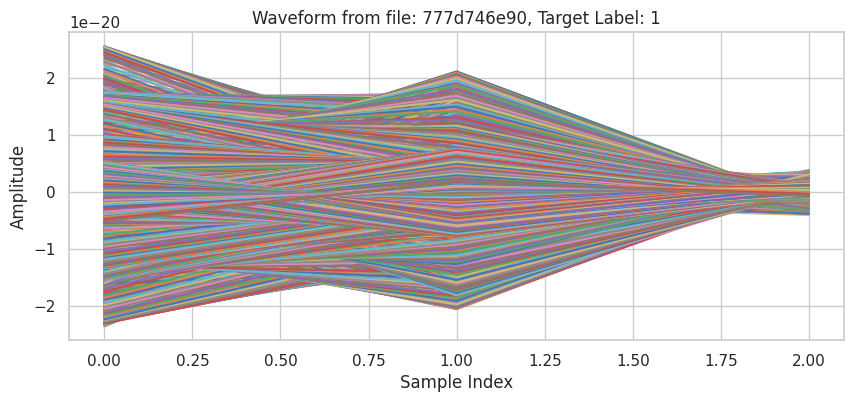

In [31]:
# Load one of the numpy arrays (e.g., the first one in the list)
example_file = all_files[0]
waveform_data = np.load(example_file)

# Extract the file ID from the filename
file_id = os.path.basename(example_file).replace('.npy', '')

# Find the target label for this file ID in the train_df DataFrame
target_label = train_df.loc[train_df['id'] == file_id, 'target'].values[0]

# Display basic information about the numpy array
print(f"File: {example_file}")
print(f"Shape: {waveform_data.shape}")
print(f"Data Type: {waveform_data.dtype}")

# Plot the waveform data
plt.figure(figsize=(10, 4))
plt.plot(waveform_data)
plt.title(f'Waveform from file: {file_id}, Target Label: {target_label}')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
# Code for data overview
# train.info()
# train.describe()

## Initial Visualizations
<a id='Initial-Visualizations'></a>
Create initial visualizations to understand the distributions and relationships in the data.

In [ ]:
# Code for initial visualizations
# sns.pairplot(train)
# plt.show()

---
# Data Preprocessing
<a id='Data-Preprocessing'></a>
Clean the data and prepare it for modeling.

## Handling Missing Values
<a id='Handling-Missing-Values'></a>
Identify and handle missing values in the dataset.

In [ ]:
# Code for handling missing values
# train.isnull().sum()
# train = train.fillna(method='ffill')

## Feature Engineering
<a id='Feature-Engineering'></a>
Create new features from the existing data to improve model performance.

In [ ]:
# Code for feature engineering
# Example: Creating a feature from existing data
# train['new_feature'] = train['feature1'] * train['feature2']

---
# Exploratory Data Analysis (EDA)
<a id='Exploratory-Data-Analysis'></a>
Perform in-depth exploratory data analysis to discover patterns and insights.

In [ ]:
# Code for exploratory data analysis
# sns.heatmap(train.corr(), annot=True, cmap='coolwarm')
# plt.show()

---
# Signal Processing
<a id='Signal-Processing'></a>
Preprocess the raw time-series signal data to extract meaningful features.

In [ ]:
# Code for signal processing
# from scipy.signal import butter, lfilter

# Define a function for bandpass filtering
# def butter_bandpass(lowcut, highcut, fs, order=5):
#     nyquist = 0.5 * fs
#     low = lowcut / nyquist
#     high = highcut / nyquist
#     b, a = butter(order, [low, high], btype='band')
#     return b, a

# def bandpass_filter(data, lowcut, highcut, fs, order=5):
#     b, a = butter_bandpass(lowcut, highcut, fs, order=order)
#     y = lfilter(b, a, data)
#     return y

# Apply the filter to the signal data
# train['filtered_signal'] = train['signal'].apply(lambda x: bandpass_filter(x, 20, 450, 1000))

---
# Model Building
<a id='Model-Building'></a>

## Model Selection
<a id='Model-Selection'></a>
Select the appropriate models to train on the data.

In [ ]:
# Code for model selection
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier

# Split the data
# X = train.drop('target', axis=1)
# y = train['target']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training
<a id='Model-Training'></a>
Train the selected models on the training data.

In [ ]:
# Code for model training
# Initialize and train the model
# model = RandomForestClassifier()
# model.fit(X_train, y_train)

## Hyperparameter Tuning
<a id='Hyperparameter-Tuning'></a>
Tune the hyperparameters of the models to improve performance.

In [ ]:
# Code for hyperparameter tuning
# from sklearn.model_selection import GridSearchCV

# Define the parameter grid
# param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}

# Initialize and perform grid search
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train)

# Best parameters
# grid_search.best_params_

---
# Model Evaluation
<a id='Model-Evaluation'></a>
Evaluate the performance of the model using appropriate metrics.

## Performance Metrics
<a id='Performance-Metrics'></a>
Use various metrics to evaluate the model's performance.

In [ ]:
# Code for performance metrics
# from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Make predictions
# y_pred = model.predict(X_test)
# y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# auc = roc_auc_score(y_test, y_pred_proba)
# report = classification_report(y_test, y_pred)

# print('Accuracy:', accuracy)
# print('AUC:', auc)
# print('Classification Report:\n', report)

## Cross-Validation
<a id='Cross-Validation'></a>
Use cross-validation to ensure the model's performance is consistent.

In [ ]:
# Code for cross-validation
# from sklearn.model_selection import cross_val_score

# Perform cross-validation
# cv_scores = cross_val_score(model, X, y, cv=5)
# print('Cross-validation scores:', cv_scores)
# print('Mean cross-validation score:', np.mean(cv_scores))

---
# Model Interpretability
<a id='Model-Interpretability'></a>
Interpret the model to understand its decisions.

## Feature Importance
<a id='Feature-Importance'></a>
Identify the most important features that influence the model's predictions.

In [ ]:
# Code for feature importance
# importances = model.feature_importances_
# indices = np.argsort(importances)[::-1]

# Print the feature ranking
# print('Feature ranking:')
# for f in range(X.shape[1]):
#     print('%d. feature %d (%f)' % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances
# plt.figure()
# plt.title('Feature importances')
# plt.bar(range(X.shape[1]), importances[indices], align='center')
# plt.xticks(range(X.shape[1]), indices)
# plt.xlim([-1, X.shape[1]])
# plt.show()

---
# Conclusion
<a id='Conclusion'></a>
Summarize the findings and potential next steps.

Summarize your findings, the performance of your model, and any insights you gained from the analysis. Discuss any potential improvements or next steps for further analysis.

---

# References
<a id='References'></a>
List any references or resources you used in your analysis.

1. Reference 1
2. Reference 2
3. Reference 3

---